# $MNIST   DATA     SET $

In [160]:
import tensorflow as tf

In [161]:
import matplotlib.pyplot as plt
import numpy as np

In [162]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [173]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [174]:
print(x_train[0].shape)

(28, 28)


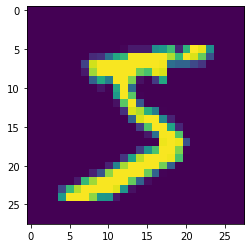

In [175]:
plt.imshow(x_train[0])

In [166]:
x_train=x_train.reshape(-1,28*28).astype("float32")/255.0

In [167]:
x_test=x_test.reshape(-1,28*28).astype("float32")/255.0
print(x_train[0].shape)

(784,)


In [168]:
#Sequential API 
Model=keras.Sequential(
        [
            keras.Input(shape=(28*28)),
            layers.Dense(512,activation='relu'),
            layers.Dense(256,activation='relu'),
            layers.Dense(128,activation='relu'),
            layers.Dense(64,activation='relu'),
            layers.Dense(10),
        ]
)
print(Model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 575,050
Trainable params: 575,050
Non-trainable params: 0
_________________________________________________________________
None


In [169]:
Model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy'],
)

In [170]:
Model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=2)
Model.evaluate(x_test,y_test,batch_size=32,verbose=2)
Model.save('mnist_Ashish.h5')
print("Model saved")

Epoch 1/10
1875/1875 - 12s - loss: 0.3414 - accuracy: 0.9113
Epoch 2/10
1875/1875 - 11s - loss: 0.2248 - accuracy: 0.9451
Epoch 3/10
1875/1875 - 11s - loss: 0.1895 - accuracy: 0.9561
Epoch 4/10
1875/1875 - 11s - loss: 0.1827 - accuracy: 0.9583
Epoch 5/10
1875/1875 - 13s - loss: 0.1604 - accuracy: 0.9630
Epoch 6/10
1875/1875 - 13s - loss: 0.1880 - accuracy: 0.9570
Epoch 7/10
1875/1875 - 15s - loss: 0.1496 - accuracy: 0.9661
Epoch 8/10
1875/1875 - 22s - loss: 0.2039 - accuracy: 0.9569
Epoch 9/10
1875/1875 - 20s - loss: 0.1954 - accuracy: 0.9586
Epoch 10/10
1875/1875 - 21s - loss: 0.1839 - accuracy: 0.9610
313/313 - 2s - loss: 0.2242 - accuracy: 0.9571
Model saved


In [188]:
def result(img):
        img=img.reshape(-1,28*28).astype("float32")/255.0
        p=Model.predict(img)
        p=p.flatten()
        maxi=0
        j=0
        i=0
        for i in range(0,10):
            if(maxi<p[i]):
                maxi=p[i]
                j=i       
        print("This Image is " +str(j))
        print(p)
           
                              
        

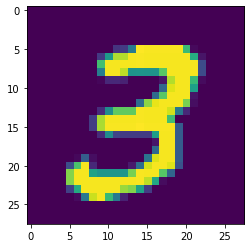

In [196]:
plt.imshow(x_train[7])

In [197]:
result(x_train[7])

This Image is 3
[ -69.78573     13.119095    -1.7942907   81.48386    -88.29763
   43.0224    -255.05988     16.106802    20.043812     7.9829493]
